In [1]:
#Packages to be installed
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
# netcdf4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray 

In [2]:
# Importing dataset and creating combined matrix for TRMM datasets
#The matrix contains the precipitation data columnwise for each day. Rows represents the 10*8=80 grids
def readTRMM(filepath_data):
    trmm_combined = np.zeros([80,1])
    files = glob.glob(filepath_data)
    for i in range(0,len(files)):
        dataset = xr.open_dataset(files[i]) #Opening TRMM datasets
        ppt = np.array(dataset['precipitation'][:])
        ppt_reshaped = ppt.reshape(80,1) #reads data column by column and then reshaped into single column. 
        trmm_combined = np.append(trmm_combined,ppt_reshaped,axis=1)
    return np.delete(trmm_combined,0,1)

In [3]:
# Importing dataset and creating combined matrix for IMERG datasets
#The matrix contains the precipitation data columnwise for each day. Rows represents the 10*8=80 grids
def readIMERG(filepath_data):
    gpm_combined = np.zeros([80,1])
    files = glob.glob(filepath_data)
    for i in range(0,len(files)):
        dataset = xr.open_dataset(files[i]) #Opening GPM datasets
        ppt = np.array(dataset['precipitationCal'][:])
        ppt_reshaped = ppt.reshape(80,1) #reads data column by column and then reshaped into single column. 
        gpm_combined = np.append(gpm_combined,ppt_reshaped,axis=1)
    return np.delete(gpm_combined,0,1)

In [4]:
# Importing dataset and creating combined matrix for CHIRPS datasets
#The matrix contains the precipitation data columnwise for each day. Rows represents the 10*8=80 grids
#Why transpose?
#For chirps, array is logntiude in columns, latitude in rows. But for other datasets, longitude in rows, latitude in columns. 
def readCHIRPS(filepath_data):
    chirps_combined = np.zeros([80,1])#Same as number of pixels 10*8
    files = glob.glob(filepath_data)
    ppt_chirps = np.empty([])
    for i in range(0,365):
        dataset = xr.open_dataset(files[0]) #Opening CHIRPS datasets
        ppt = np.transpose(np.array(dataset['precip'][i]))
        ppt_reshaped = ppt.reshape(80,1) #reads data column by column and then reshaped into single column. 
        chirps_combined = np.append(chirps_combined,ppt_reshaped,axis=1)
    return np.delete(chirps_combined,0,1)

In [5]:
#since datasets were in three folders for each years, creating yearly combined matrix 
TRMM_2001 = readTRMM('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/TRMM_3B42/Processed/2001/*.nc4')
TRMM_2002 = readTRMM('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/TRMM_3B42/Processed/2002/*.nc4')
TRMM_2003 = readTRMM('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/TRMM_3B42/Processed/2003/*.nc4')

In [6]:
#since datasets were in three folders for each years, creating yearly combined matrix
GPM_2001 = readIMERG('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/GPM_IMERG/Processed/2001/*.nc4')
GPM_2002 = readIMERG('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/GPM_IMERG/Processed/2002/*.nc4')
GPM_2003 = readIMERG('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/GPM_IMERG/Processed/2003/*.nc4')

In [7]:
#since datasets were in three folders for each years, creating yearly combined matrix
CHIRPS_2001 = readCHIRPS('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/CHIRPS0_25/processed/2001/*.nc')
CHIRPS_2002 = readCHIRPS('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/CHIRPS0_25/processed/2002/*.nc')
CHIRPS_2003 = readCHIRPS('C:/SuSe2021/RemoteSensinginHydrology/Voluntary/CHIRPS0_25/processed/2003/*.nc')

In [8]:
#The trmm_combined finally will contains all data. column represents all days of the three years. Rows represent grid values.
trmm_combined = np.empty([80,1])
trmm_combined = np.append(trmm_combined,TRMM_2001,axis=1)
trmm_combined = np.append(trmm_combined,TRMM_2002,axis=1)
trmm_combined = np.append(trmm_combined,TRMM_2003,axis=1)
trmm_combined = np.delete(trmm_combined,0,1)
np.savetxt('trmm.csv',trmm_combined, delimiter = ',')

In [9]:
#The chirps_combined finally will contains all data. column represents all days of the three years. Rows represent grid values.
chirps_combined = np.empty([80,1])
chirps_combined = np.append(chirps_combined,CHIRPS_2001,axis=1)
chirps_combined = np.append(chirps_combined,CHIRPS_2002,axis=1)
chirps_combined = np.append(chirps_combined,CHIRPS_2003,axis=1)
chirps_combined = np.delete(chirps_combined,0,1) # 0 means first , 1 is axis = column. Deletes the first column
np.savetxt('chirps.csv',chirps_combined, delimiter = ',')

In [10]:
#The GPM_combined finally will contains all data. column represents all days of the three years. Rows represent grid values.
GPM_combined = np.empty([80,1])
GPM_combined = np.append(GPM_combined,GPM_2001,axis=1)
GPM_combined = np.append(GPM_combined,GPM_2002,axis=1)
GPM_combined = np.append(GPM_combined,GPM_2003,axis=1)
GPM_combined = np.delete(GPM_combined,0,1) # 0 means first , 1 is axis = column. Deletes the first column
np.savetxt('gpm.csv',GPM_combined, delimiter = ',')

In [11]:
#Function to calculate the metrics pod,far,csi
def evaluation(dataset1,dataset2):
    hit = 0
    false = 0
    miss = 0 
    null = 0
    hit = hit + np.logical_and(dataset1 > 0, dataset2 >0)
    false = false + np.logical_and(dataset1 > 0, dataset2 == 0) 
    miss = miss + np.logical_and(dataset1 == 0, dataset2 > 0) 
    null = null + np.logical_and(dataset1 == 0, dataset2 == 0) 
    pod = np.sum(hit)/(np.sum(hit)+np.sum(miss))
    far = np.sum(false)/(np.sum(hit)+np.sum(false))
    csi = np.sum(hit)/(np.sum(hit)+np.sum(false)+np.sum(miss))
    return pod,far,csi

In [12]:
#Evaluation trmm and chirps dataset
evaluation(trmm_combined,chirps_combined)

(0.7750661570126434, 0.40153815591565684, 0.5099015886065237)

In [13]:
#Evaluation gpm and chirps dataset
evaluation(GPM_combined ,chirps_combined)

(0.9641281975889444, 0.5411258440331665, 0.45117127033813764)

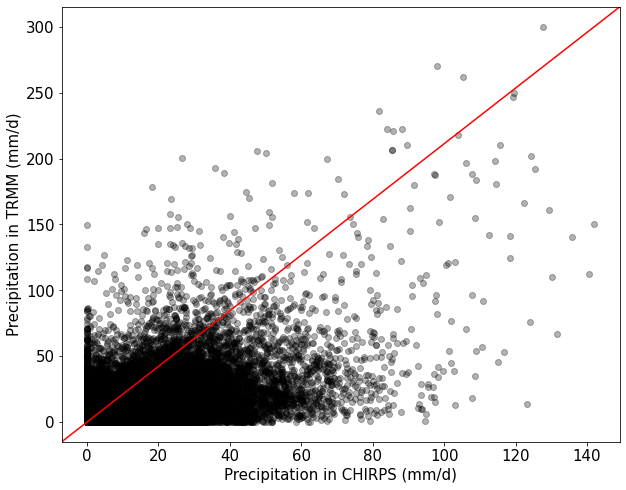

In [14]:
#Plotting scatter plot of TRMM vs CHIRPS
plt.figure(figsize=[10,8])
x = chirps_combined
y = trmm_combined
plt.scatter(x,y, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Precipitation in CHIRPS (mm/d)',fontsize=15)
plt.ylabel('Precipitation in TRMM (mm/d)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, '-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.savefig('Scatter_TRMM.jpg',dpi=300)

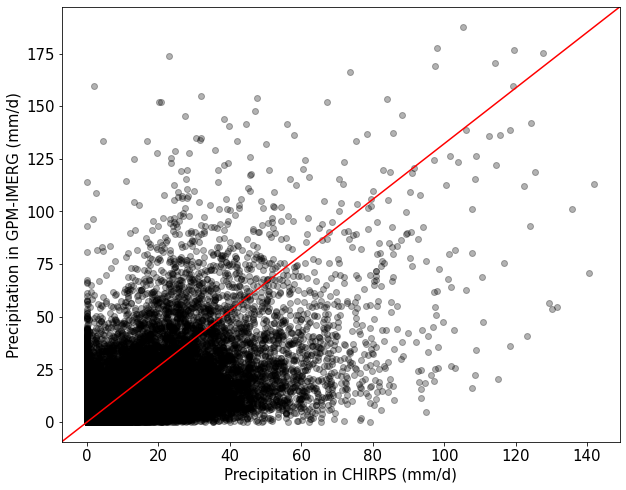

In [15]:
#Plotting scatter plot of GPM vs CHIRPS
plt.figure(figsize=[10,8])
x = chirps_combined
y = GPM_combined
plt.scatter(x,y, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Precipitation in CHIRPS (mm/d)',fontsize=15)
plt.ylabel('Precipitation in GPM-IMERG (mm/d)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, '-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.savefig('Scatter_GPM.jpg',dpi=300)

In [16]:
#Calculation of r_square metrics 
def r_square(dataset1,dataset2):
    dataset1 = dataset1.flatten()
    dataset2 = dataset2.flatten()
    correlation_matrix = np.corrcoef(dataset1,dataset2)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared

In [17]:
#computing rsquare value for GPM and chirps daily scale 
r_square(GPM_combined,chirps_combined)

0.44806148011469665

In [18]:
#computing rsquare value for trmm and chirps daily scale 
r_square(trmm_combined,chirps_combined)

0.4074272315761117

In [19]:
#Function to calculate RBIAS
def RBIAS(dataset1,dataset2):
    dataset1 = dataset1.flatten()
    dataset2 = dataset2.flatten()
    BIAS = (np.sum(dataset1)/np.sum(dataset2))-1
    return BIAS

In [20]:
#computing rbias value for GPM and chirps daily scale 
RBIAS(GPM_combined,chirps_combined)

0.042282533171346115

In [21]:
#computing rbias value for trmm and chirps daily scale 
RBIAS(trmm_combined,chirps_combined)

0.12633314625983671

In [22]:
#Function to calculate ME
def ME(dataset1,dataset2):
    dataset1 = dataset1.flatten()
    dataset2 = dataset2.flatten()
    M_error = np.sum(dataset1-dataset2)/np.size(dataset1)
    return M_error

In [23]:
#computing ME value for GPM and chirps daily scale 
ME(GPM_combined,chirps_combined)

0.1832795424600446

In [24]:
#computing ME value for trmm and chirps daily scale 
ME(trmm_combined,chirps_combined)

0.5476086579347094

In [25]:
#Function to calculate MAE
def MAE(dataset1,dataset2):
    dataset1 = dataset1.flatten()
    dataset2 = dataset2.flatten()
    MA_error = np.sum(np.abs(dataset1-dataset2))/np.size(dataset1)
    return MA_error

In [26]:
#computing MAE value for GPM and chirps daily scale 
MAE(GPM_combined,chirps_combined)

3.6288942679809515

In [27]:
#computing MAE value for trmm and chirps daily scale 
MAE(trmm_combined,chirps_combined)

4.081946403645277

In [28]:
#Function to calculate RMSE
def RMSE(dataset1,dataset2):
    dataset1 = dataset1.flatten()
    dataset2 = dataset2.flatten()
    root_error = np.sqrt((np.sum((dataset1 - dataset2) ** 2))/np.size(dataset1))
    return root_error

In [29]:
#computing RMSE value for GPM and chirps daily scale 
RMSE(GPM_combined,chirps_combined)

8.892745681509977

In [30]:
#computing RMSE value for trmm and chirps daily scale 
RMSE(trmm_combined,chirps_combined)

10.165860611307817

In [31]:
#function to calculate occurence frequency 
#returns the occurence frequency in sequence: 0-1,1-2,2-5,5-10,10-20,20-50,>50
def occurencefrequency(dataset):
    dataset_gt_0 = np.sum(dataset>0)
    of_dataset_0_1 = (np.sum(np.logical_and(dataset>0,dataset<=1))/dataset_gt_0)*100
    of_dataset_1_2 = (np.sum(np.logical_and(dataset>1,dataset<=2))/dataset_gt_0)*100
    of_dataset_2_5 = (np.sum(np.logical_and(dataset>2,dataset<=5))/dataset_gt_0)*100
    of_dataset_5_10 = (np.sum(np.logical_and(dataset>5,dataset<=10))/dataset_gt_0)*100
    of_dataset_10_20 = (np.sum(np.logical_and(dataset>10,dataset<=20))/dataset_gt_0)*100
    of_dataset_20_50 = (np.sum(np.logical_and(dataset>20,dataset<=50))/dataset_gt_0)*100
    of_dataset_gt_50 = (np.sum(dataset>50)/dataset_gt_0)*100
    return of_dataset_0_1,of_dataset_1_2,of_dataset_2_5,of_dataset_5_10,of_dataset_10_20,of_dataset_20_50,of_dataset_gt_50


In [32]:
#Calculating occurence frequency for chirps daily data 
of_chirps = occurencefrequency(chirps_combined)
of_chirps

(12.338282857982946,
 7.946192296383417,
 15.844604528079975,
 17.693325492502204,
 20.98647456630403,
 21.5708615113202,
 3.6202587474272274)

In [33]:
#Calculating occurence frequency for trmm daily data 
of_trmm = occurencefrequency(trmm_combined)
of_trmm

(17.572438062264098,
 10.01504100803133,
 18.863694412123618,
 16.90552544200698,
 17.72001021653376,
 15.18290433351307,
 3.7403865255271445)

In [34]:
#Calculating occurence frequency for gpm daily data 
of_gpm = occurencefrequency(GPM_combined)
of_gpm

(42.72469649791834,
 9.566875415456739,
 15.021166427596825,
 12.315012419969912,
 10.507994262323757,
 7.948780743798761,
 1.915474232935661)

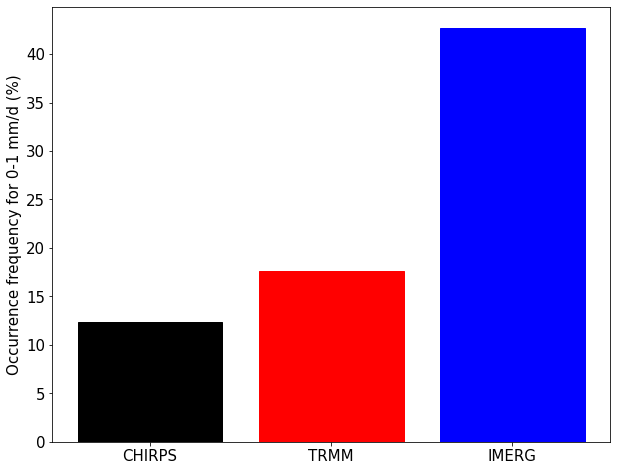

In [35]:
#Plotting bar of occurence frequency for 0 to 1 mm 
plt.figure(figsize=[10,8])
of_0_1 = np.array([of_chirps[0],of_trmm[0],of_gpm[0]])
x = np.array(['CHIRPS','TRMM','IMERG'])
bar = plt.bar(x,of_0_1)
bar[0].set_color('k')
bar[1].set_color('r')
bar[2].set_color('b')
plt.xticks(x, fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel('Occurrence frequency for 0-1 mm/d (%)',fontsize=15)
plt.savefig('Occurence_frequency_0to1.jpg',dpi=300)

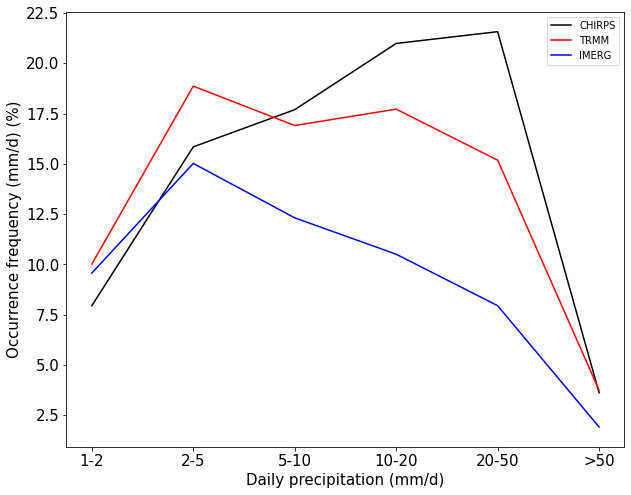

In [36]:
#Plotting line plot for other occurence frequency
plt.figure(figsize=[10,8])
plt.plot(of_chirps[1:7], color = 'k', label = 'CHIRPS')
plt.plot(of_trmm[1:7], color = 'r', label = 'TRMM')
plt.plot(of_gpm[1:7], color = 'b', label = 'IMERG')
x = np.array(['1-2','2-5','5-10','10-20','20-50','>50'])
plt.legend()
positions = (0,1,2,3,4,5)
plt.xticks(positions, x, fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel('Occurrence frequency (mm/d) (%)',fontsize=15)
plt.xlabel('Daily precipitation (mm/d)', fontsize=15)
plt.savefig('Occurence_frequency.jpg',dpi=300)

In [37]:
#Function to accumulation of daily dataset to get monthly dataset 
def monthlydata(dataset):
    monthly = np.empty([80,1])
    days = np.array([0,31,59,90,120,151,181,212,243,273,304,334,365]) #defining days range
    for i in range(0,3): #year
        for j in range(0,12): # months in a year
            dataset_selected = dataset[:,days[j]+i*365:days[j+1]+i*365] #Selecting monthly
            accumulated = dataset_selected.sum(axis=1) #Columnwise sum 
            accumulated = accumulated.reshape(80,1)
            monthly = np.append(monthly,accumulated,axis=1)
    return np.delete(monthly,0,1)

In [38]:
#Monthly accumulation dataset calculation 
chirps_monthly = monthlydata(chirps_combined)
np.savetxt('chirps_monthly.csv',chirps_monthly, delimiter = ',')

In [39]:
#Monthly accumulation dataset calculation
trmm_monthly = monthlydata(trmm_combined)
np.savetxt('trmm_monthly.csv',trmm_monthly, delimiter = ',')

In [40]:
#Monthly accumulation dataset calculation
gpm_monthly = monthlydata(GPM_combined)
np.savetxt('gpm_monthly.csv',gpm_monthly, delimiter = ',')

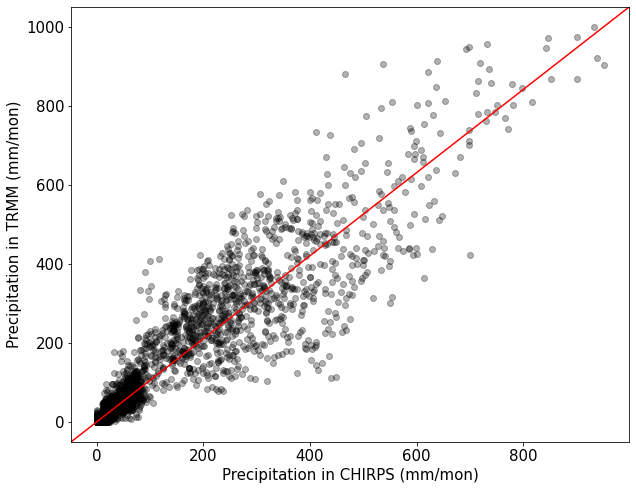

In [41]:
#Plotting scatter plot of TRMM vs CHIRPS monthly scale
plt.figure(figsize=[10,8])
x = chirps_monthly
y = trmm_monthly
plt.scatter(x,y, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Precipitation in CHIRPS (mm/mon)',fontsize=15)
plt.ylabel('Precipitation in TRMM (mm/mon)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, '-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.savefig('Scatter_TRMM_monthly.jpg',dpi=300)

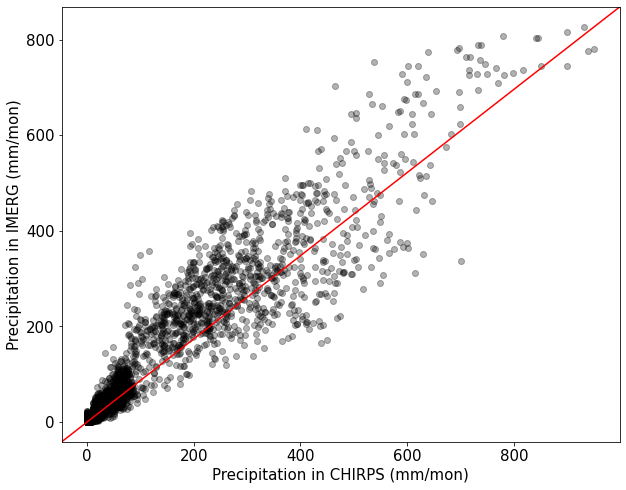

In [42]:
#Plotting scatter plot of TRMM vs GPM monthly scale
plt.figure(figsize=[10,8])
x = chirps_monthly
y = gpm_monthly
plt.scatter(x,y, marker = 'o', color = 'k', alpha = 0.3)
plt.xlabel('Precipitation in CHIRPS (mm/mon)',fontsize=15)
plt.ylabel('Precipitation in IMERG (mm/mon)',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, '-', color = 'r')
plt.ylim(y_lim)
plt.xlim(x_lim)

plt.savefig('Scatter_IMERG_monthly.jpg',dpi=300)

In [43]:
#Computing rsquare value monthly scale for chirps and gpm
r_square(chirps_monthly,gpm_monthly)

0.8755522948221374

In [44]:
#Computing RBIAS value monthly scale for chirps and gpm
RBIAS(chirps_monthly,gpm_monthly)

-0.040567247196106715

In [45]:
#Computing ME value monthly scale for chirps and gpm
ME(chirps_monthly,gpm_monthly)

-5.574752749826356

In [46]:
#Computing MAE value monthly scale for chirps and gpm
MAE(chirps_monthly,gpm_monthly)

35.19499686057293

In [47]:
#Computing RMSE value monthly scale for chirps and gpm
RMSE(chirps_monthly,gpm_monthly)

58.18165695101036

In [48]:
#Computing rsquare value monthly scale for chirps and trmm
r_square(chirps_monthly,trmm_monthly)

0.8530278129519553

In [49]:
#Computing RBIAS value monthly scale for chirps and trmm
RBIAS(chirps_monthly,trmm_monthly)

-0.1121632144799658

In [50]:
#Computing ME value monthly scale for chirps and trmm
ME(chirps_monthly,trmm_monthly)

-16.656430012180742

In [51]:
#Computing MAE value monthly scale for chirps and trmm
MAE(chirps_monthly,trmm_monthly)

42.98687010993405

In [52]:
#Computing RMSE value monthly scale for chirps and trmm
RMSE(chirps_monthly,trmm_monthly)

70.96242937875024

In [53]:
#Function to calculate average monthly ppt for three years 
def meanmonthly(dataset):
    mean_monthlyppt = np.zeros([80,1])
    for i in range(0,12):
        mean_month = (dataset[:,0+i]+dataset[:,12+i]+dataset[:,24+i])/3
        mean_month = mean_month.reshape(80,1)
        mean_monthlyppt = np.append(mean_monthlyppt,mean_month,axis=1)
    return np.delete(mean_monthlyppt,0,1)

In [54]:
#Calculation of mean monthly ppt for different datasets
chirps_monthly_mean = meanmonthly(chirps_monthly)
trmm_monthly_mean = meanmonthly(trmm_monthly)
gpm_monthly_mean = meanmonthly(gpm_monthly)

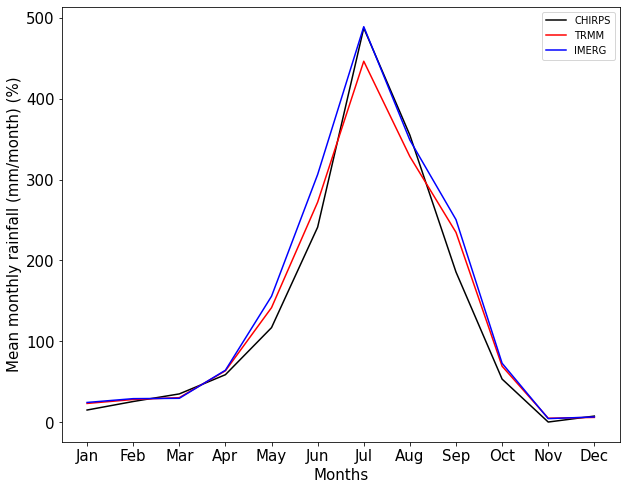

In [55]:
#Plotting timeseries of mean monthly precipitation for different datasets
plt.figure(figsize=[10,8])
plt.plot(np.mean(chirps_monthly_mean,axis=0), color = 'k', label = 'CHIRPS')
plt.plot(np.mean(gpm_monthly_mean,axis=0), color = 'r', label = 'TRMM')
plt.plot(np.mean(trmm_monthly_mean,axis=0), color = 'b', label = 'IMERG')
x = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
plt.xticks(positions, x, fontsize = 15)
plt.yticks(fontsize=15)
plt.ylabel('Mean monthly rainfall (mm/month) (%)',fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.savefig('Mean_monthly_timeseries.jpg',dpi=300)

In [56]:
# monsoon in Nepal; June, July, August, September [6,7,8,9]
# dry: Dec, Jan, Feb [12,1,2]
# pre monsoon : Mar,Apr,May[3,4,5]
#post_monsoon : Oct, Nov [10,11]
#Function to calculate seasonal average from monthly mean data
def season(dataset):
    seasonal = np.zeros([80,1])
    pre_monsoon = ((dataset[:,2]+dataset[:,3]+dataset[:,4])/3).reshape(80,1)
    seasonal = np.append(seasonal,pre_monsoon,axis=1)
    monsoon = ((dataset[:,5]+dataset[:,6]+dataset[:,7]+dataset[:,8])/4).reshape(80,1)
    seasonal = np.append(seasonal,monsoon,axis=1)
    post_monsoon = ((dataset[:,9]+dataset[:,10])/2).reshape(80,1)
    seasonal = np.append(seasonal,post_monsoon,axis=1)
    dry = ((dataset[:,11]+dataset[:,0]+dataset[:,1])/3).reshape(80,1)
    seasonal = np.append(seasonal,dry,axis=1)
    return np.delete(seasonal,0,1) #returns in sequence pre-monsoon, monsoon,post-monsoon,dry 


In [57]:
#Computing seasonal average ppt for three years 
chirps_seasonal = season(chirps_monthly_mean)
trmm_seasonal = season(trmm_monthly_mean)
gpm_seasonal = season(gpm_monthly_mean)

In [58]:
#Calculating percentage of monsoon ppt for chirps data 
chirps_seasonalmean = np.mean(chirps_seasonal,axis=0)
monsoonpercent_chirps = chirps_seasonalmean[1]/np.sum(chirps_seasonalmean)*100
monsoonpercent_chirps

73.71861242127791

In [59]:
#Calculating percentage of monsoon ppt for trmm data
trmm_seasonalmean = np.mean(trmm_seasonal,axis=0)
monsoonpercent_trmm = trmm_seasonalmean[1]/np.sum(trmm_seasonalmean)*100
monsoonpercent_trmm

71.07342636728463

In [60]:
#Calculating percentage of monsoon ppt for gpm data
gpm_seasonalmean = np.mean(gpm_seasonal,axis=0)
monsoonpercent_gpm = gpm_seasonalmean[1]/np.sum(gpm_seasonalmean)*100
monsoonpercent_gpm 

70.39789010814476

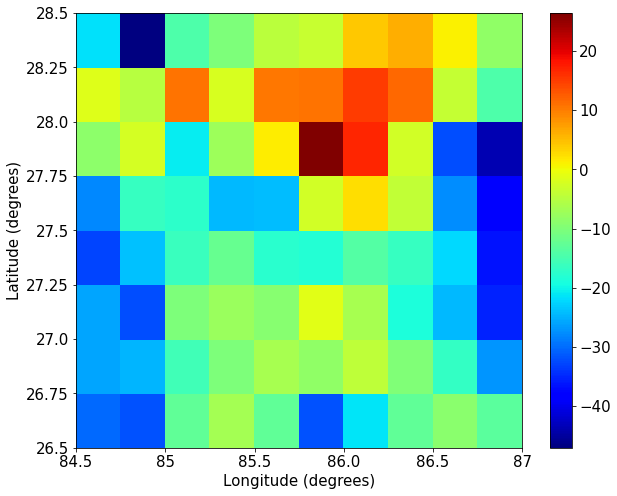

In [65]:
#Difference map for premonsoon chirps and trmm
plt.figure(figsize=[10,8])
chirps_premonsoon = np.transpose(chirps_seasonal[:,0].reshape(10,8))
trmm_premonsoon = np.transpose(trmm_seasonal[:,0].reshape(10,8))
difference_premonsoon = chirps_premonsoon - trmm_premonsoon
plt.pcolor(difference_premonsoon, cmap='jet')
#plt.colorbar()
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_premonsoon_trmm.jpg',dpi=300)

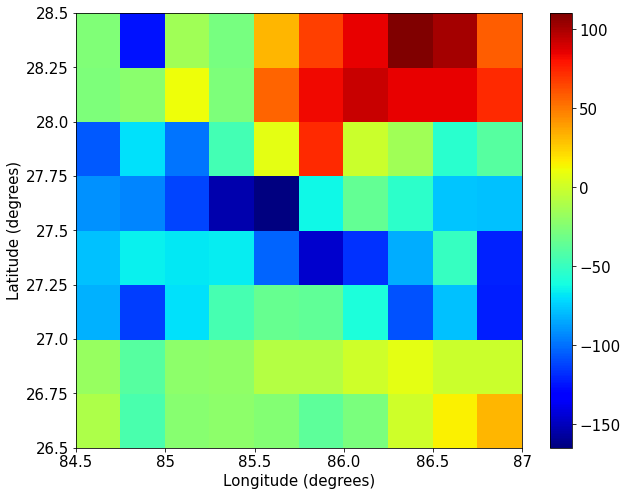

In [66]:
#Difference map for monsoon chirps and trmm
plt.figure(figsize=[10,8])
chirps_monsoon = np.transpose(chirps_seasonal[:,1].reshape(10,8))
trmm_monsoon = np.transpose(trmm_seasonal[:,1].reshape(10,8))
difference_monsoon = chirps_monsoon - trmm_monsoon
plt.pcolor(difference_monsoon, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_monsoon_trmm.jpg',dpi=300)

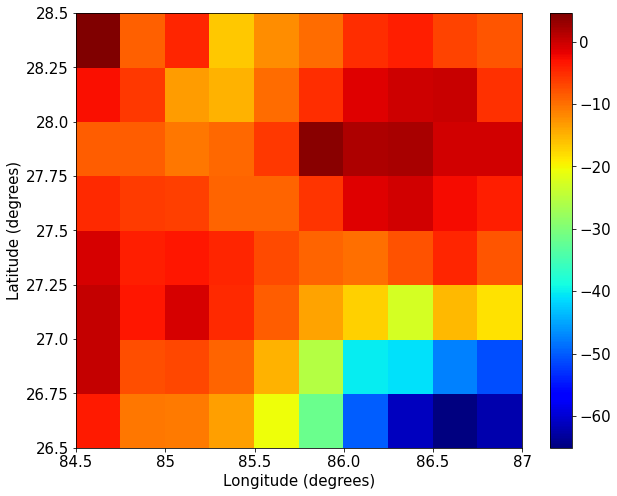

In [67]:
#Difference map for postmonsoon chirps and trmm
plt.figure(figsize=[10,8])
chirps_postmonsoon = np.transpose(chirps_seasonal[:,2].reshape(10,8))
trmm_postmonsoon = np.transpose(trmm_seasonal[:,2].reshape(10,8))
difference_postmonsoon = chirps_postmonsoon - trmm_postmonsoon
plt.pcolor(difference_postmonsoon, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_postmonsoon_trmm.jpg',dpi=300)

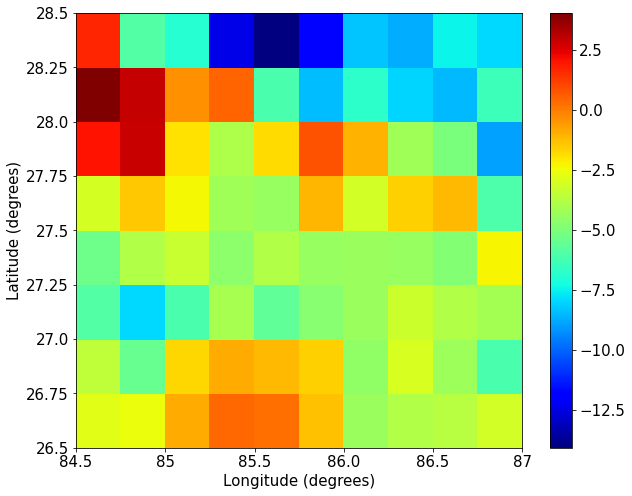

In [68]:
#Difference map for dry chirps and trmm
plt.figure(figsize=[10,8])
chirps_dry = np.transpose(chirps_seasonal[:,3].reshape(10,8))
trmm_dry = np.transpose(trmm_seasonal[:,3].reshape(10,8))
difference_dry = chirps_dry - trmm_dry
plt.pcolor(difference_dry, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_dry_trmm.jpg',dpi=300)

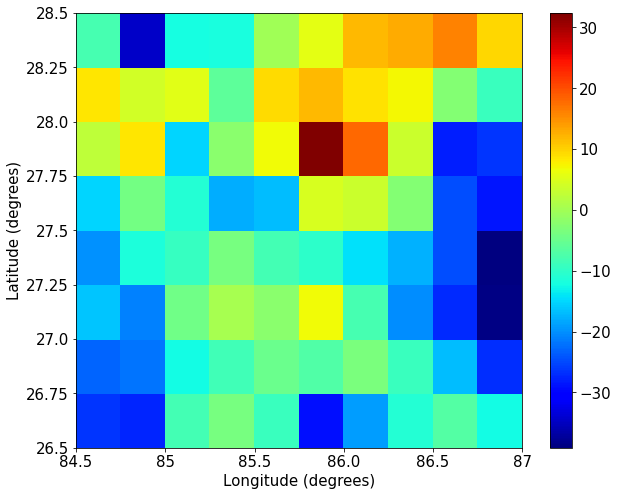

In [69]:
#Difference map for premonsoon chirps and gpm
plt.figure(figsize=[10,8])
chirps_premonsoon = np.transpose(chirps_seasonal[:,0].reshape(10,8))
gpm_premonsoon = np.transpose(gpm_seasonal[:,0].reshape(10,8))
difference_premonsoon = chirps_premonsoon - gpm_premonsoon
plt.pcolor(difference_premonsoon, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_premonsoon_gpm.jpg',dpi=300)

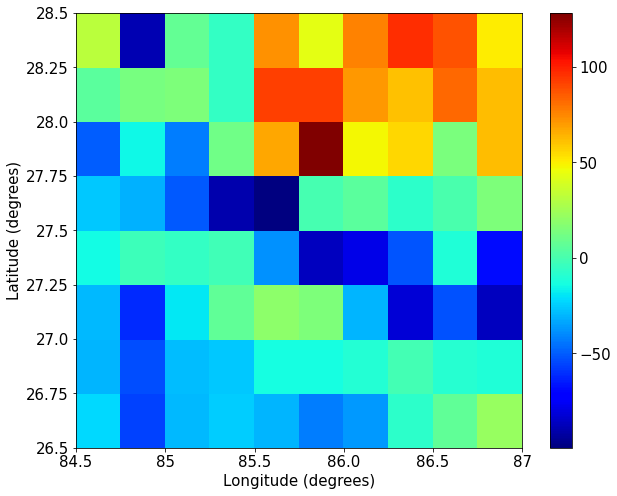

In [70]:
#Difference map for monsoon chirps and gpm
plt.figure(figsize=[10,8])
chirps_monsoon = np.transpose(chirps_seasonal[:,1].reshape(10,8))
gpm_monsoon = np.transpose(gpm_seasonal[:,1].reshape(10,8))
difference_monsoon = chirps_monsoon - gpm_monsoon
plt.pcolor(difference_monsoon, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_monsoon_gpm.jpg',dpi=300)

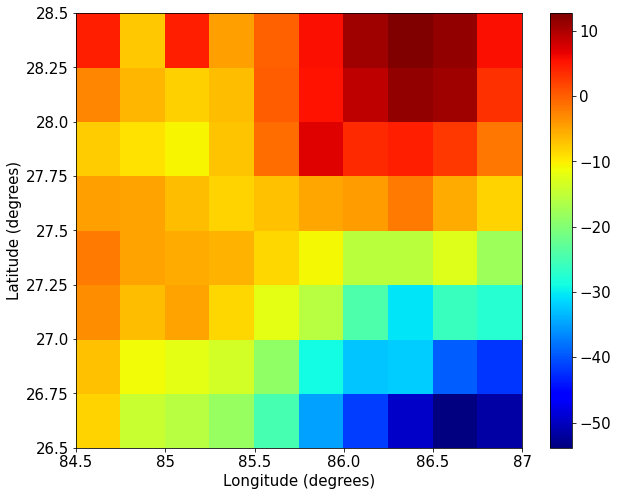

In [71]:
#Difference map for postmonsoon chirps and gpm
plt.figure(figsize=[10,8])
chirps_postmonsoon = np.transpose(chirps_seasonal[:,2].reshape(10,8))
gpm_postmonsoon = np.transpose(gpm_seasonal[:,2].reshape(10,8))
difference_postmonsoon = chirps_postmonsoon - gpm_postmonsoon
plt.pcolor(difference_postmonsoon, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_postmonsoon_gpm.jpg',dpi=300)

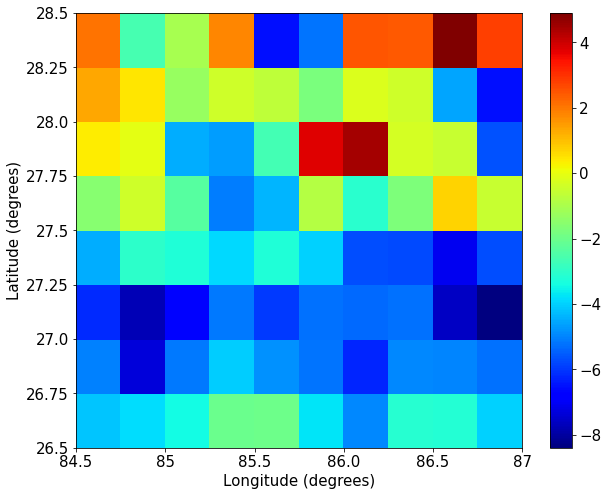

In [72]:
#Difference map for dry chirps and gpm
plt.figure(figsize=[10,8])
chirps_dry = np.transpose(chirps_seasonal[:,3].reshape(10,8))
gpm_dry = np.transpose(gpm_seasonal[:,3].reshape(10,8))
difference_dry = chirps_dry - gpm_dry
plt.pcolor(difference_dry, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Difference_dry_gpm.jpg',dpi=300)

In [74]:
#Function to calculate the yearly average spatially 
def yearlydata(dataset):
    yearly = np.empty([80,1])
    #days = np.array([0,31,59,90,120,151,181,212,243,273,304,334,365]) #defining days range
    for i in range(0,3): #year
        #for j in range(0,12): # months in a year
        dataset_selected = dataset[:,0+i*365:365+i*365] #Selecting monthly
        accumulated = dataset_selected.sum(axis=1) #Columnwise sum 
        accumulated = accumulated.reshape(80,1)
        yearly = np.append(yearly,accumulated,axis=1)
    return np.delete(yearly,0,1)

In [75]:
#Computing yearly average for each grids for each year for different datasets 
chirps_yearly = yearlydata(chirps_combined)
trmm_yearly = yearlydata(trmm_combined)
gpm_yearly = yearlydata(GPM_combined)

In [76]:
#Computing average precipitation for three years for different datasets 
chirps_yearly_avg = np.mean(chirps_yearly,axis=1)
chirps_yearly_avg = chirps_yearly_avg.reshape(80,1)
chirps_yearly_avg = np.transpose(chirps_yearly_avg.reshape(10,8))

In [77]:
trmm_yearly_avg = np.mean(trmm_yearly,axis=1)
trmm_yearly_avg = trmm_yearly_avg.reshape(80,1)
trmm_yearly_avg = np.transpose(trmm_yearly_avg.reshape(10,8))

In [78]:
gpm_yearly_avg = np.mean(gpm_yearly,axis=1)
gpm_yearly_avg = gpm_yearly_avg.reshape(80,1)
gpm_yearly_avg = np.transpose(gpm_yearly_avg.reshape(10,8))

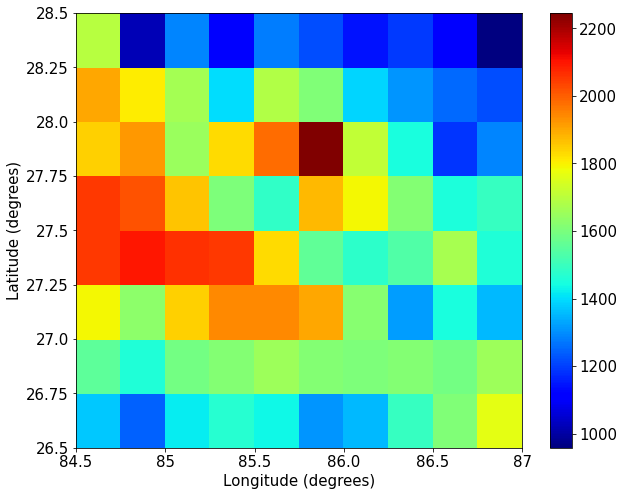

In [79]:
#Yearly average chirps
plt.figure(figsize=[10,8])
plt.pcolor(chirps_yearly_avg, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Yearlyaverage_chirps.jpg',dpi=300)

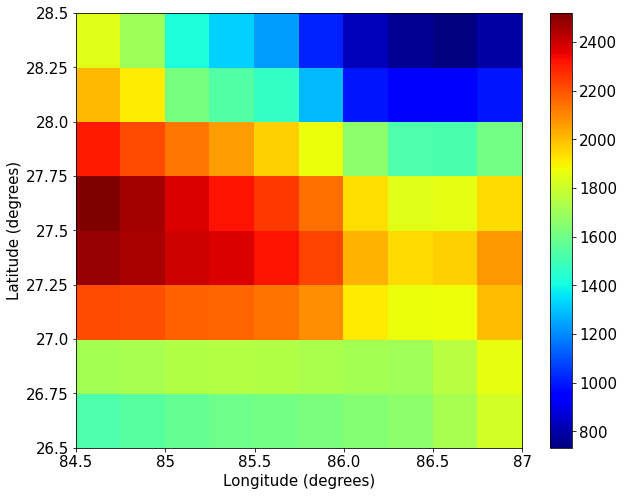

In [80]:
#Yearly average trmm
plt.figure(figsize=[10,8])
plt.pcolor(trmm_yearly_avg, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Yearlyaverage_trmm.jpg',dpi=300)

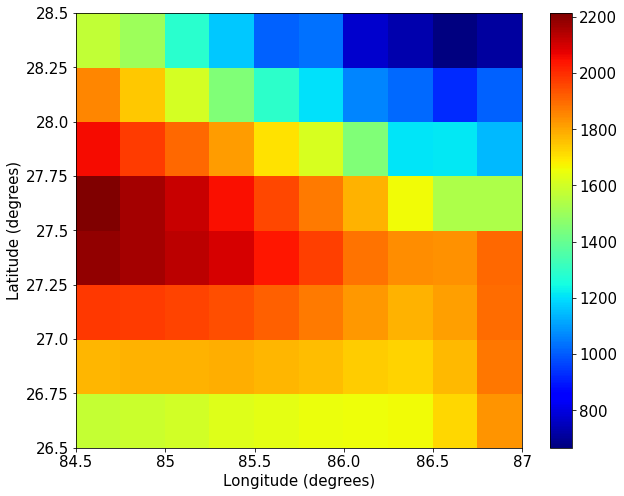

In [81]:
#Yearly average gpm
plt.figure(figsize=[10,8])
plt.pcolor(gpm_yearly_avg, cmap='jet')
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)
x_label_list = (84.5,85,85.5,86.0,86.5,87)
y_label_list = (26.50,26.75,27.00,27.25,27.50,27.75,28.00,28.25,28.50)
plt.xticks([0,2,4,6,8,10],x_label_list,fontsize = 15)
plt.yticks([0,1,2,3,4,5,6,7,8],y_label_list, fontsize = 15)
plt.ylabel('Latitude (degrees)',fontsize=15)
plt.xlabel('Longitude (degrees)', fontsize=15)
plt.savefig('Yearlyaverage_gpm.jpg',dpi=300)